In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# LogisticRegression feature selection

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
wine = load_wine()
print(list(wine.target_names))
print(wine.data)
wine.target[ wine.target ==0 ] = 1 # we use only two classes 
print(wine.target)

['class_0', 'class_1', 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( StandardScaler().fit_transform(wine.data), wine.target, stratify = wine.target, random_state=42)
print(X_train.shape)

(133, 13)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [8]:
from sklearn.linear_model import LogisticRegression

lr_l1 = LogisticRegression(C=1, penalty="l2").fit(X_train, y_train)
print(lr_l1.coef_)

[[ 0.32429035  0.49182102  0.52915893  0.28591952 -0.08505525 -0.33744342
  -1.4289057   0.0320818  -0.73448023  1.08676067 -1.24746451 -0.93470981
   0.04795472]]


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [9]:
lr_l2 = LogisticRegression(C=100, penalty="l2").fit(X_train, y_train)
print(lr_l2.coef_)

[[ 0.35733139  0.75341179  2.21231133  0.28925471 -0.81697505  0.05284877
  -4.80778579 -0.45389417 -2.21994338  2.90236424 -3.70512205 -1.9358591
   0.89246414]]


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [10]:
lr_l3 = LogisticRegression(C=0.01, penalty="l2").fit(X_train, y_train)
print(lr_l3.coef_)

[[ 0.04009902  0.1447627   0.04776858  0.09919169 -0.02251074 -0.15641823
  -0.22698014  0.10729339 -0.13272795  0.18334644 -0.21704461 -0.2346479
  -0.05442632]]


# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.

C =  0.01   1.0
C =  0.01   0.9555555555555556


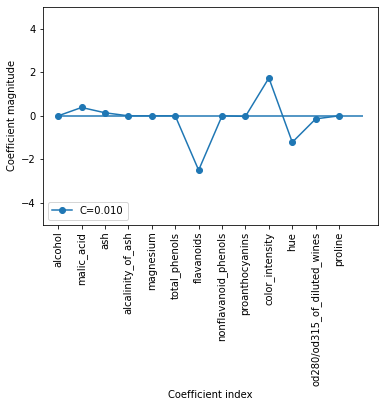

In [15]:
for par_reg, marker in zip([1], ['o-', '^-', 'v-']):
    lr_l1 = LogisticRegression(C=par_reg, penalty='l1', solver='liblinear').fit(X_train, y_train)

    print("C = ", C," ", lr_l1.score(X_train, y_train))
    print("C = ", C, " ", lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
    plt.hlines(0, 0, wine.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)
    plt.show()


C =  0.01   0.9774436090225563
C =  0.01   0.9555555555555556


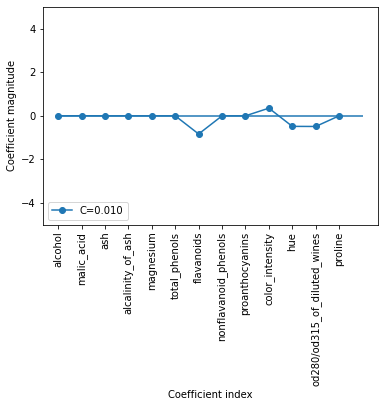

In [16]:
for par_reg, marker in zip([0.1], ['o-', '^-', 'v-']):
    lr_l1 = LogisticRegression(C=par_reg, penalty='l1', solver='liblinear').fit(X_train, y_train)

    print("C = ", C," ", lr_l1.score(X_train, y_train))
    print("C = ", C, " ", lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
    plt.hlines(0, 0, wine.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)
    plt.show()


C =  0.01   0.7293233082706767
C =  0.01   0.7333333333333333


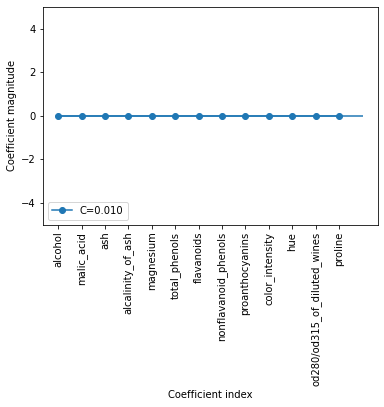

In [17]:
for par_reg, marker in zip([0.01], ['o-', '^-', 'v-']):
    lr_l1 = LogisticRegression(C=par_reg, penalty='l1', solver='liblinear').fit(X_train, y_train)

    print("C = ", C," ", lr_l1.score(X_train, y_train))
    print("C = ", C, " ", lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
    plt.hlines(0, 0, wine.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)
    plt.show()


C =  0.01   1.0
C =  0.01   1.0


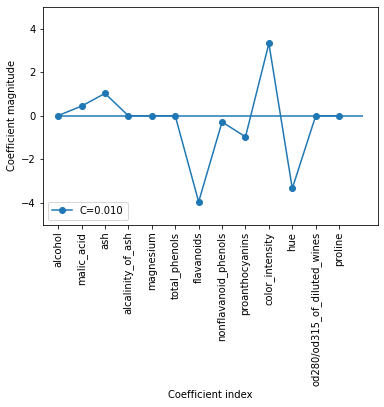

In [18]:
for par_reg, marker in zip([10], ['o-', '^-', 'v-']):
    lr_l1 = LogisticRegression(C=par_reg, penalty='l1', solver='liblinear').fit(X_train, y_train)

    print("C = ", C," ", lr_l1.score(X_train, y_train))
    print("C = ", C, " ", lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
    plt.hlines(0, 0, wine.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)
    plt.show()
